# Et si on codait les pronos Kona 2016 ?

Tout est dans le titre. Bien-sûr, on pourrait le faire à la main, mais si on écrit en instructions informatiques le traitement des pronos pour Kona 2016, on pourra espérer ne plus avoir rien à faire quand il faudra le refaire pour Kona 2017 (à part mettre à jour les entrées avec les votes 2016 au lieu de 2017)

## Partie 1 : Affichage des pronostics

In [1]:
# Importer des fabuleuses librairies Python Pandas et Matplolib
import pandas as pd
%matplotlib inline

In [2]:
# Ouverture du fichier contenant les votes (sans les adresses mail)
file = "2016_kona_pronostics.csv"
df = pd.read_csv(file, delimiter=';', encoding = "ISO-8859-1")

In [3]:
# Affichage du nombre de joueurs
df.shape[0]

213

In [4]:
# Affichage des pronostics pour la 1ère place
# Pour garder la liste courte, seuls les 10 athlètes les plus souvent cités sont affichés
df.Athlete1.value_counts(normalize=True).head(10)

FRO     0.690141
KIE     0.112676
RAE     0.070423
THOM    0.023474
ODO     0.014085
SAN     0.014085
MCK     0.014085
HOF     0.014085
BIL     0.004695
MCN     0.004695
Name: Athlete1, dtype: float64

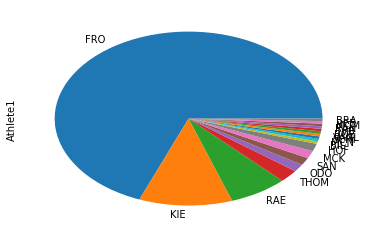

In [5]:
# Idem, Affichage des pronostics pour la 1ère place, mais sous forme de graphique 
df.Athlete1.value_counts(normalize=True).plot(kind='pie')

In [6]:
# Affichage des pronostics pour la 2ème place
df.Athlete2.value_counts(normalize=True).head(10)

KIE     0.399061
FRO     0.140845
VIE     0.056338
SAN     0.051643
HOF     0.046948
POTT    0.042254
RAE     0.037559
BOE     0.037559
VANL    0.032864
ODO     0.023474
Name: Athlete2, dtype: float64

In [7]:
# Affichage des pronostics pour la 3ème place
df.Athlete3.value_counts(normalize=True).head(10)

VIE     0.197183
KIE     0.140845
RAE     0.107981
VANL    0.093897
FRO     0.084507
SAN     0.061033
HOF     0.037559
STE     0.032864
CUN     0.028169
POTT    0.028169
Name: Athlete3, dtype: float64

In [8]:
# Affichage des pronostics pour la 4ème place
df.Athlete4.value_counts(normalize=True).head(10)

VIE     0.215962
VANL    0.098592
RAE     0.093897
KIE     0.070423
POTT    0.061033
SAN     0.056338
CUN     0.046948
HOF     0.046948
THOM    0.037559
MCM     0.028169
Name: Athlete4, dtype: float64

In [9]:
# Affichage des pronostics pour la 5ème place
df.Athlete5.value_counts(normalize=True).head(10)

VIE     0.140845
KIE     0.089202
SAN     0.089202
RAE     0.079812
VANL    0.070423
ODO     0.056338
POTT    0.051643
HOF     0.042254
STE     0.037559
THOM    0.032864
Name: Athlete5, dtype: float64

In [10]:
# Affichage des pronostics pour la 6ème place
df.Athlete6.value_counts(normalize=True).head(10)

VIE     0.117371
VANL    0.089202
SAN     0.079812
POTT    0.079812
KIE     0.070423
CUN     0.065728
CHE     0.056338
RAE     0.051643
HOF     0.032864
STE     0.028169
Name: Athlete6, dtype: float64

## Partie 2 : Algorithme du calcul des points

Les règles étaient annoncées comme étant simple. 
* 10 points par bonne position.
* 6 points pour 1 athlète qui termine à 1 place de ton pronostic.
* 4 points pour 1 athlète qui termine à 2 places de ton pronostic.
* 2 points pour 1 athlète qui termine à 3 places de ton pronostic.
* 1 point pour 1 athlète qui termine à 4 places de ton pronostic.

En mettant ça en lignes de code, on voit que ça demande quelques lignes de code quand même et que l'on est encore loin des régles formulée en language naturel !

In [11]:
def calculate_points(player):
    
    points_1 = 0
    points_2 = 0
    points_3 = 0
    points_4 = 0
    points_5 = 0
    points_6 = 0
    
    # if athlete estimated as 1st arrived 1st
    if player.Athlete1 == results[1]:
        points_1 = 10 
    # if athlete estimated as 1st arrived 2nd
    elif player.Athlete1 == results[2]:
        points_1 = 6 
    # if athlete estimated as 1st arrived 3rd
    elif player.Athlete1 == results[3]:
        points_1 = 4 
    # if athlete estimated as 1st arrived 4th
    elif player.Athlete1 == results[4]:
        points_1 = 2 
    # if athlete estimated as 1st arrived 5th
    elif player.Athlete1 == results[5]:
        points_1 = 1 
        
    # if athlete estimated as 2nd arrived 1st
    if player.Athlete2 == results[1]:
        points_2 = 6 
    # if athlete estimated as 2nd arrived 2nd
    elif player.Athlete2 == results[2]:
        points_2 = 10 
    # ...
    elif player.Athlete2 == results[3]:
        points_2 = 6 
    elif player.Athlete2 == results[4]:
        points_2 = 4 
    elif player.Athlete2 == results[5]:
        points_2 = 2 
    elif player.Athlete2 == results[6]:
        points_2 = 1 
 
    if player.Athlete3 == results[1]:
        points_3 = 4 
    elif player.Athlete3 == results[2]:
        points_3 = 6 
    elif player.Athlete3 == results[3]:
        points_3 = 10 
    elif player.Athlete3 == results[4]:
        points_3 = 6
    elif player.Athlete3 == results[5]:
        points_3 = 4 
    elif player.Athlete3 == results[6]:
        points_3 = 2 
    elif player.Athlete3 == results[7]:
        points_3 = 1 
    
    if player.Athlete4 == results[1]:
        points_4 = 2 
    elif player.Athlete4 == results[2]:
        points_4 = 4 
    elif player.Athlete4 == results[3]:
        points_4 = 6 
    elif player.Athlete4 == results[4]:
        points_4 = 10 
    elif player.Athlete4 == results[5]:
        points_4 = 6 
    elif player.Athlete4 == results[6]:
        points_4 = 4 
    elif player.Athlete4 == results[7]:
        points_4 = 2 
    elif player.Athlete4 == results[8]:
        points_4 = 1 
        
    if player.Athlete5 == results[1]:
        points_5 = 1 
    elif player.Athlete5 == results[2]:
        points_5 = 2 
    elif player.Athlete5 == results[3]:
        points_5 = 4 
    elif player.Athlete5 == results[4]:
        points_5 = 6
    elif player.Athlete5 == results[5]:
        points_5 = 10
    elif player.Athlete5 == results[6]:
        points_5 = 6 
    elif player.Athlete5 == results[7]:
        points_5 = 4 
    elif player.Athlete5 == results[8]:
        points_5 = 2 
    elif player.Athlete5 == results[9]:
        points_5 = 1 

    if player.Athlete6 == results[1]:
        points_6 = 0 
    elif player.Athlete6 == results[2]:
        points_6 = 1 
    elif player.Athlete6 == results[3]:
        points_6 = 2 
    elif player.Athlete6 == results[4]:
        points_6 = 4 
    elif player.Athlete6 == results[5]:
        points_6 = 6 
    elif player.Athlete6 == results[6]:
        points_6 = 10 
    elif player.Athlete6 == results[7]:
        points_6 = 6 
    elif player.Athlete6 == results[8]:
        points_6 = 4 
    elif player.Athlete6 == results[9]:
        points_6 = 2 
    elif player.Athlete6 == results[10]:
        points_6 = 1 
         
        
    return points_1 + points_2 + points_3 + points_4 + points_5 + points_6


## Partie 3 : Résultat des pronostiques

Recopions les résultats officiels des 10 premiers PRO hommes publiés sur http://eu.ironman.com/triathlon/events/americas/ironman/world-championship/results.aspx?rd=20161008 

In [12]:
results = {1:'FRO', 2:'KIE', 3:'LAN', 4:'HOF', 5:'BOE', 6:'ODO', 7:'STE', 8:'AER', 9:'RAN', 10:'VANL'}
res = pd.Series(results)

In [13]:
# Pour chaque joueur, calcul le nombre de Points issu de son pronostic à l'aide de l'algo calculate_points
df['Points'] = df.apply(calculate_points, axis=1)

# Ensuite, tri des joueurs par ordre décroissant des Points (i.e. le gagnant sera sur la 1ère ligne)
df = df.sort_values(by ='Points', ascending=False)

# sombre détail technique, reset de l'index de chaque joueur
# pour que l'index affiché corresponde à l'ordre des gagnants.
# ... il y aura un décalage de 1 en fait car l'index commence à 0
df = df.reset_index(drop=True)

# Affichage des 10 meilleurs pronostics
df.head(10)

,Player,Athlete1,Athlete2,Athlete3,Athlete4,Athlete5,Athlete6,Datetime,Points
0,Matt,FRO,KIE,VIE,HOF,STE,AER,2016-10-02 12:41:45,38
1,Guillaume Belgy,FRO,KIE,VANL,HOF,ODO,VIE,2016-10-03 07:56:35,36
2,max,FRO,KIE,HOF,RAE,BOE,VIE,2016-10-02 15:17:56,36
3,dff,FRO,KIE,VIE,RAE,ODO,STE,2016-10-04 12:31:01,32
4,JOFFRE,FRO,KIE,VIE,VANL,HOF,STE,2016-10-02 13:15:30,32
5,Henry matthieu,FRO,KIE,VIE,ODO,HOF,VANL,2016-10-02 12:26:07,31
6,Nicolas ZAMBON,FRO,KIE,BUTT,HOF,WEI,VIE,2016-10-02 18:26:26,30
7,Eric,FRO,KIE,CHE,HOF,RAE,VIE,2016-10-03 13:23:26,30
8,Balestreri,FRO,KIE,WEI,BOE,STE,CUN,2016-10-03 00:37:37,30
9,TriRating,FRO,KIE,RAE,MCM,POTT,ODO,2017-10-11 08:30:00,30


In [14]:
# Affichage du score obtenu par le célèbre 'TriRating' 
df[df.Player == 'TriRating']

,Player,Athlete1,Athlete2,Athlete3,Athlete4,Athlete5,Athlete6,Datetime,Points
9,TriRating,FRO,KIE,RAE,MCM,POTT,ODO,2017-10-11 08:30:00,30


In [15]:
# Pour la postérité, sauvegardons les résultats complets dans un fichier
file2 = "2016_kona_pronostics_classement.csv"
df.to_csv(file2, sep=';', encoding = "ISO-8859-1", index=False)